In [15]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
plots_dir = "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/plots_darksky/"

# Plot

In [17]:
nmc = 20

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))
maxts_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([3,5,7,9,11])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_loc1_inj100_dm' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        elephantm = [11]) # 52 for 10 TeV
    limit_ary_temp, xsec_max_ary_temp, maxts_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,11,:]
    limit_ary[idm] = limit_ary_temp[-1,11,:]
    maxts_ary[idm] = maxts_ary_temp[-1,11,:]
    
xsec_max = np.log10(np.percentile(xsec_max_ary, [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary, [16,50,84], axis=1))
maxtss = np.percentile(10**maxts_ary, [16,50,84], axis=1)

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in power


In [4]:
np.logspace(-21,-26,6)

array([  1.00000000e-21,   1.00000000e-22,   1.00000000e-23,
         1.00000000e-24,   1.00000000e-25,   1.00000000e-26])

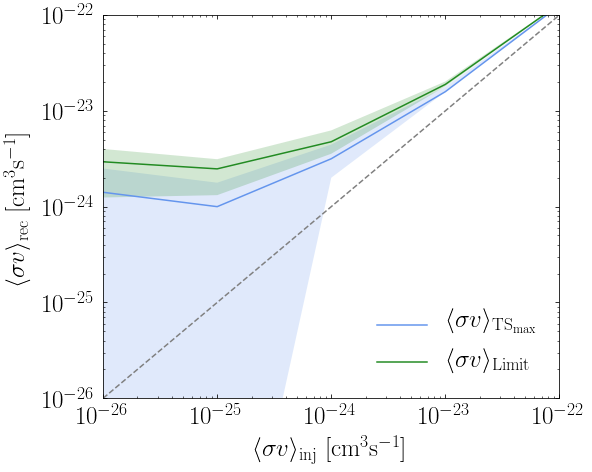

In [20]:
plot_h = 10/1.2
plot_w = 8/1.2

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))
plt.plot(np.logspace(-22,-26,5),  10**xsec_max[1], label='$\langle\sigma v \\rangle_\mathrm{TS_{max}}$')
plt.fill_between(np.logspace(-22,-26,5),  10**xsec_max[0], 10**xsec_max[2], alpha=0.2)
plt.plot(np.logspace(-22,-26,5),  10**lims[1], label='$\langle\sigma v \\rangle_\mathrm{Limit}$')
plt.fill_between(np.logspace(-22,-26,5),  10**lims[0], 10**lims[2], alpha=0.2)
plt.plot([10**-26,10**-20],[10**-26,10**-20],ls='--', color='grey')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]", fontsize=25)
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]", fontsize=25)
plt.ylim(10**-26,10**-22)
plt.xlim(10**-26,10**-22)
plt.xticks(fontsize=25);
plt.yticks(fontsize=25);
plt.yscale("log")
plt.xscale("log")
plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False, loc='lower right', fontsize=25)
# plt.title("Signal Recovery, $m_\chi = 100$ GeV", fontsize=24)
plt.tight_layout()
plt.savefig(plots_dir + "signal_recovery_100GeV_loc2.pdf")
plt.show()